In [1]:
import pandas as pd 
import numpy as np
import ast
import seaborn as sns

In [2]:
df = pd.read_csv("20240723_224358.csv")


In [3]:
df_copy = df.copy()

In [4]:
df_copy.columns

Index(['Date', 'Time', 'numObj', 'rangeIdx', 'range', 'dopplerIdx', 'doppler',
       'peakVal', 'x', 'y', 'z', 'rp', 'noiserp', 'zi', 'rangeDoppler',
       'rangeArray', 'dopplerArray', 'interFrameProcessingTime',
       'transmitOutputTime', 'interFrameProcessingMargin',
       'interChirpProcessingMargin', 'activeFrameCPULoad',
       'interFrameCPULoad'],
      dtype='object')

In [5]:
df_copy['Time'] = df_copy['Time'].astype(str)

In [6]:
df_copy['datetime'] = df_copy['Date']+ ' ' + df_copy['Time']


In [7]:
df_copy['rangeDopller'] = df_copy['rangeDoppler'].apply(ast.literal_eval) 

In [8]:
df_copy['range'] = df_copy['range'].apply(ast.literal_eval) 

In [9]:
df_copy['datetime'] = df_copy['datetime'].apply(pd.to_datetime)

/tmp/ipykernel_16930/3758817376.py:1: UserWarning: Parsing dates in %d/%m/%Y %H%M%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['datetime'] = df_copy['datetime'].apply(pd.to_datetime)


## RangeDoppler Plot

In [10]:
data =df_copy[df_copy['datetime'] == ' 2024-07-23 22:43:58']['rangeDoppler'].values.tolist()
list_data = [ast.literal_eval(i) for i in data]
array_data = [np.array(i) for i in list_data]
array_data = np.array(array_data)
array_data.shape


(4, 24, 256)

In [11]:
range_doppler_data = df_copy['rangeDoppler'].values.tolist()
range_doppler_list = [ast.literal_eval(i) for i in range_doppler_data]
range_doppler_array = [np.array(i) for i in range_doppler_list]
range_doppler_array = np.array(range_doppler_array)
range_doppler_array.shape

(55, 24, 256)

<Axes: >

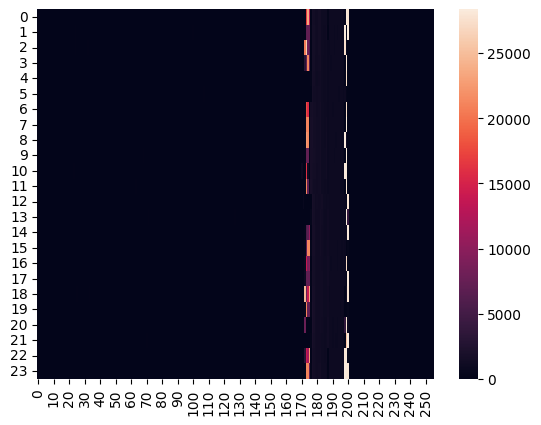

In [39]:
sns.heatmap(np.std(array_data, axis = 0))

## Noise Profile

In [38]:
noise =df_copy[df_copy['datetime'] == ' 2024-07-23 22:43:58']['noiserp'].values.tolist()

In [39]:
noise_list = [ast.literal_eval(i) for i in noise]
noise_array = np.array(noise_list)
noise_array.shape

(4, 256)

In [29]:
import matplotlib.pyplot as plt

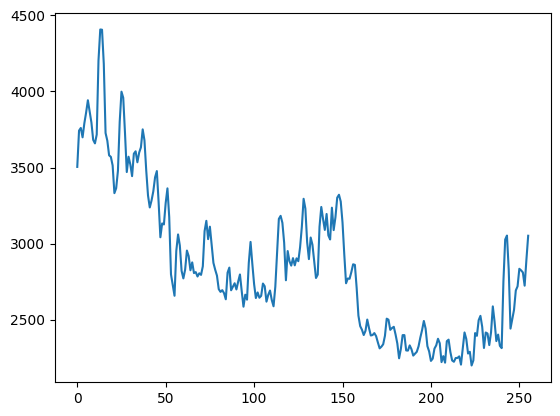

In [40]:
plt.plot(np.mean(noise_array, axis = 0))

## Range Profile Plot

In [42]:
range =df_copy[df_copy['datetime'] == ' 2024-07-23 22:43:58']['range'].values.tolist()

In [63]:
range_data = [np.array(i) for i in range]
max_length = max([len(i) for i in range_data])

range_data = [np.pad(arr,(0,max_length - len(arr)), mode = 'mean') for arr  in range_data] # Padding the list to make the them same length 
range_data = np.array(range_data)
range_data.shape


(4, 8)

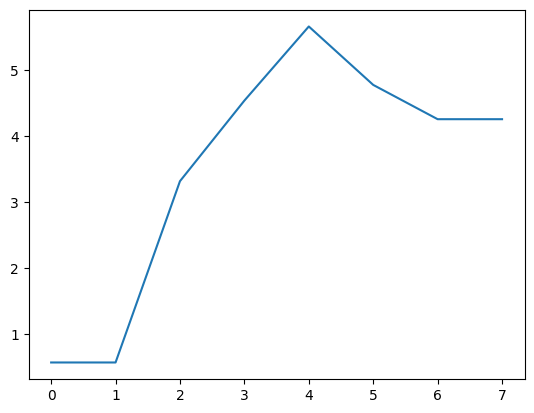

In [64]:
plt.plot(np.mean(range_data, axis = 0))